# Tutorial 10 - Q Learning
# Reinforcement Learning

In this tutorial, we are going to demonstrate how to implement Reinforcement Learning algorithm which is called the Q-Learning technique. In this demonstration, we attempt to teach a bot to reach its destination using the Q-Learning technique.

In [1]:
# Load the libraries
import numpy as np 
import pylab as pl 
import networkx as nx 

In [2]:
pip install --user decorator==4.3.0

Note: you may need to restart the kernel to use updated packages.


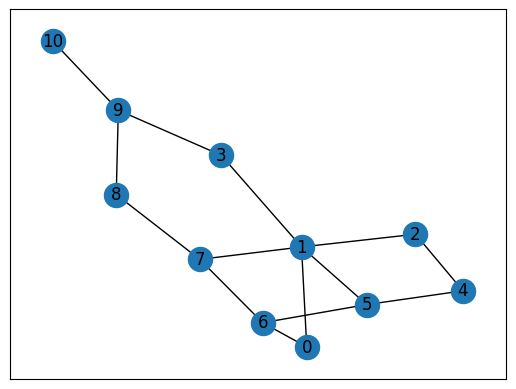

In [3]:
# Create and initialise an array named as 'edges'
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), 
        (1, 3), (9, 10), (2, 4), (0, 6), (6, 7), 
        (8, 9), (7, 8), (1, 7), (3, 9)] 

goal = 10                          # Initialise the variable named as 'goal'
G = nx.Graph()                     # Initialise an object G
G.add_edges_from(edges)            # Add edges to G by calling a method add_edges_from
pos = nx.spring_layout(G)          # Define a variable position (pos)
nx.draw_networkx_nodes(G, pos)     # Display nodes
nx.draw_networkx_edges(G, pos)     # Display edges 
nx.draw_networkx_labels(G, pos)    # Display labels on the nodes
pl.show() 
# The below graph may not look the same on reproduction of the code because the networkx library in python produces 
# a random graph from the given edges.

## Defining the reward the system for the bot

In [4]:
MATRIX_SIZE = 11                                             # Size of the matrix
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))    # Size of the matrix is 11 * 11 and initialise with 1's
M *= -1                                                      # Multiply each cell of the matrix with -1

for point in edges:                                          # for loop for all edges
    print(point)                                             # Display 'point'                                           
    if point[1] == goal: 
        M[point] = 100                                       # Set the Matrix (M) as 100 if point[1] = 10
    else: 
        M[point] = 0                                         # Set the Matrix (M) as 0 for all other points

    if point[0] == goal: 
        M[point[::-1]] = 100
    else: 
        M[point[::-1]] = 0
        # reverse of point 

M[goal, goal] = 100
print(M) 
# add goal point round trip 


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


## Defining some utility functions to be used in the training

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE])) # Initialize the matrix Q

gamma = 0.75
# learning parameter 
initial_state = 1

# Determines the available actions for a given state 
def available_actions(state): 
    current_state_row = M[state, ] 
    available_action = np.where(current_state_row >= 0)[1] 
    return available_action 

available_action = available_actions(initial_state)              # Store the value of available actions into available_action

# Chooses one of the available actions at random 
def sample_next_action(available_action_range): 
    next_action = int(np.random.choice(available_action_range, 1))   # available_action_range means maximum value of range for the random number generation
    return next_action 

action = sample_next_action(available_action)                   # Store the random value of available actions into available_action

# Write a method named as 'update'
def update(current_state, action, gamma): 
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
    if max_index.shape[0] > 1: 
        max_index = int(np.random.choice(max_index, size = 1)) 
    else: 
        max_index = int(max_index) 
    max_value = Q[action, max_index] 
    Q[current_state, action] = M[current_state, action] + gamma * max_value 
    if (np.max(Q) > 0): 
        return(np.sum(Q / np.max(Q) * 100)) 
    else: 
        return (0) 
    # Updates the Q-Matrix according to the path chosen 

update(initial_state, action, gamma) 

0

## Training and evaluating the bot using the Q-Matrix

Most efficient path:
[0, 1, 3, 9, 10]


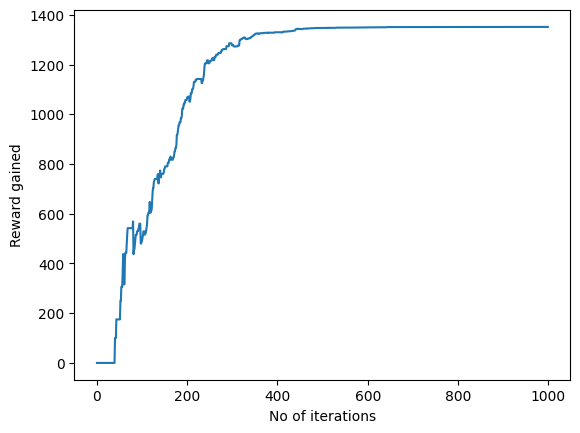

In [6]:
scores = [] 
for i in range(1000): 
    current_state = np.random.randint(0, int(Q.shape[0]))    # Iinitialise a variable 'current_state' using random numbers
    available_action = available_actions(current_state)      # call a method available_actions defined in step 4
    action = sample_next_action(available_action)            # call a method sample_next_action defined in step 4
    score = update(current_state, action, gamma)             # call a method update defined in step 4
    scores.append(score) 

# print("Trained Q matrix:") 
# print(Q / np.max(Q)*100) 
# You can uncomment the above two lines to view the trained Q matrix 

# Testing 
current_state = 0                                           # Initialise the current_state to zero
steps = [current_state]                                     # steps is an array

while current_state != 10:
    
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1] 
    if next_step_index.shape[0] > 1: 
        next_step_index = int(np.random.choice(next_step_index, size = 1)) 
    else: 
        next_step_index = int(next_step_index) 
    steps.append(next_step_index) 
    current_state = next_step_index 

print("Most efficient path:") 
print(steps) 

pl.plot(scores) 
pl.xlabel('No of iterations') 
pl.ylabel('Reward gained') 
pl.show() 

## Reference:
* <p>https://www.geeksforgeeks.org/ml-reinforcement-learning-algorithm-python-implementation-using-q-learning/</p>